In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
# droping the column Id
df.drop('Id',axis=1,inplace=True) 
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Visualising the Data

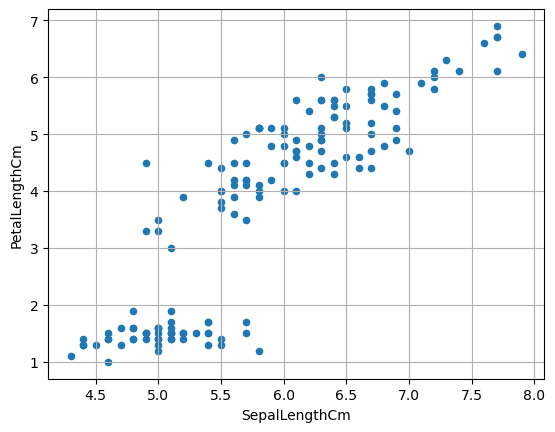

In [8]:
df.plot(kind ="scatter",
		x ='SepalLengthCm',
		y ='PetalLengthCm')
plt.grid()

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

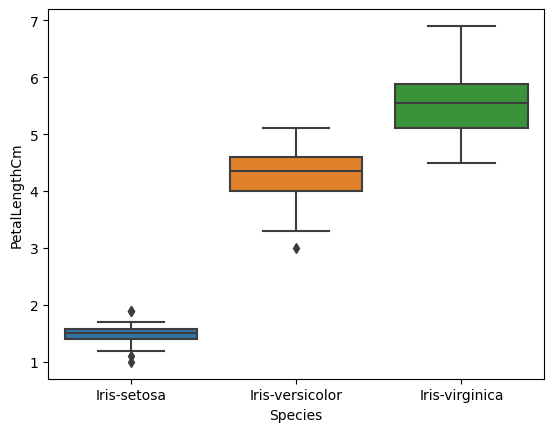

In [10]:
sns.boxplot(x='Species',y='PetalLengthCm',data=df)

C:\Users\ACER USER\AppData\Local\Temp\ipykernel_44564\2030700900.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SepalLengthCm'],hist=True)


<function matplotlib.pyplot.show(close=None, block=None)>

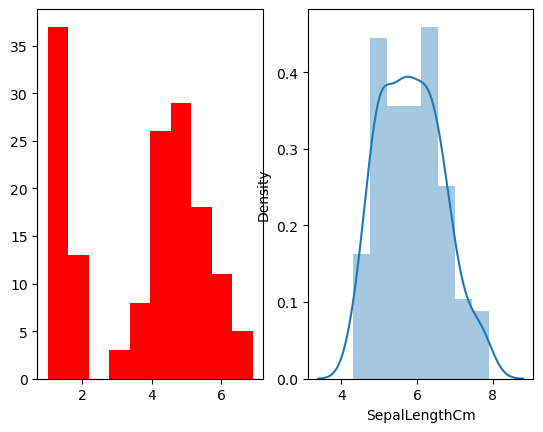

In [12]:
plt.subplot(1,2,1)
plt.hist(df['PetalLengthCm'].values,color='red')
plt.subplot(1,2,2)
sns.distplot(df['SepalLengthCm'],hist=True)
plt.show

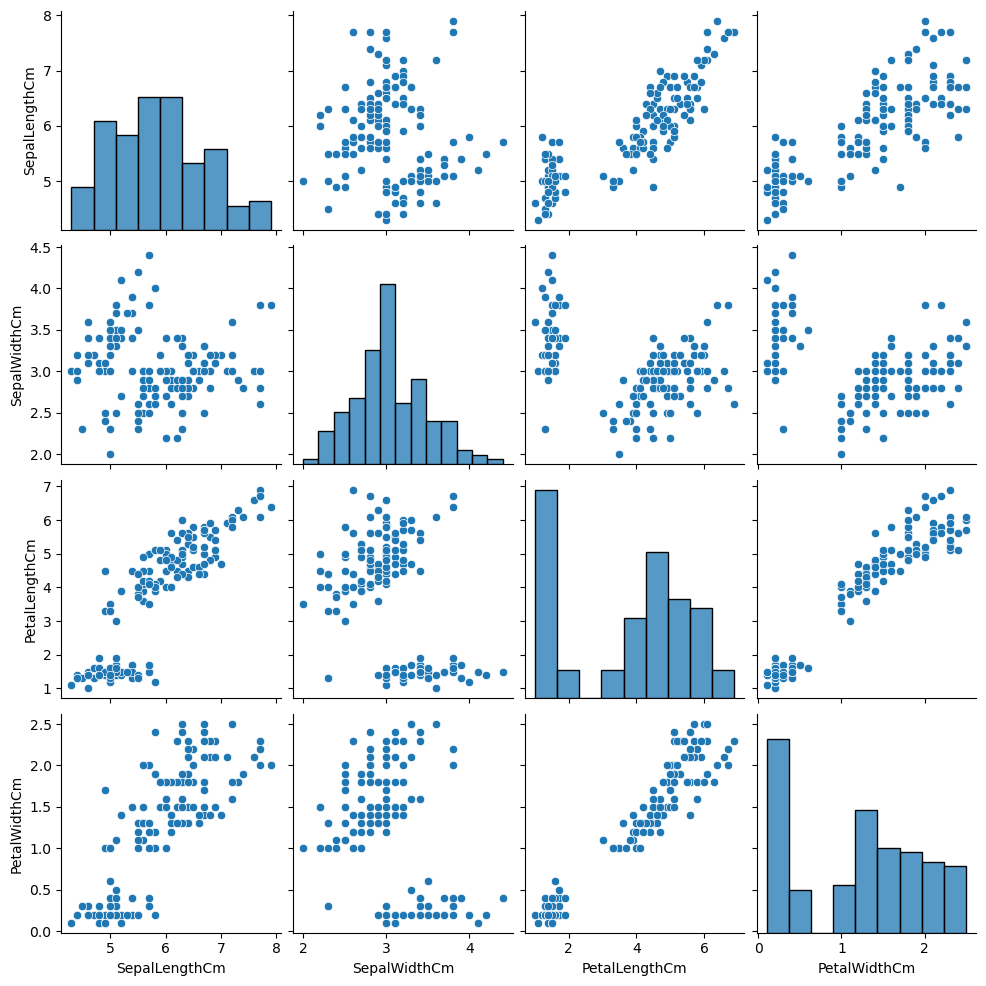

In [13]:
sns.pairplot(data=df,kind='scatter')

# Heat Map

C:\Users\ACER USER\AppData\Local\Temp\ipykernel_44564\3957458125.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

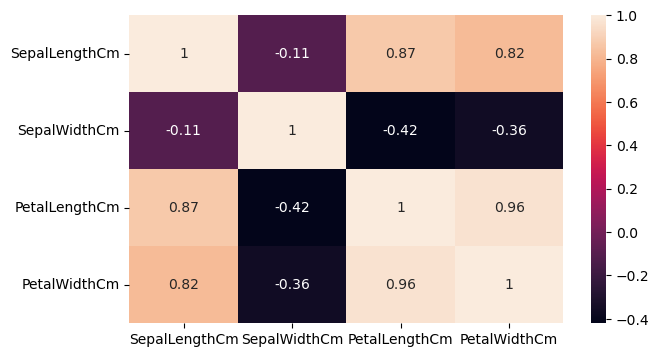

In [15]:
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(),annot=True)

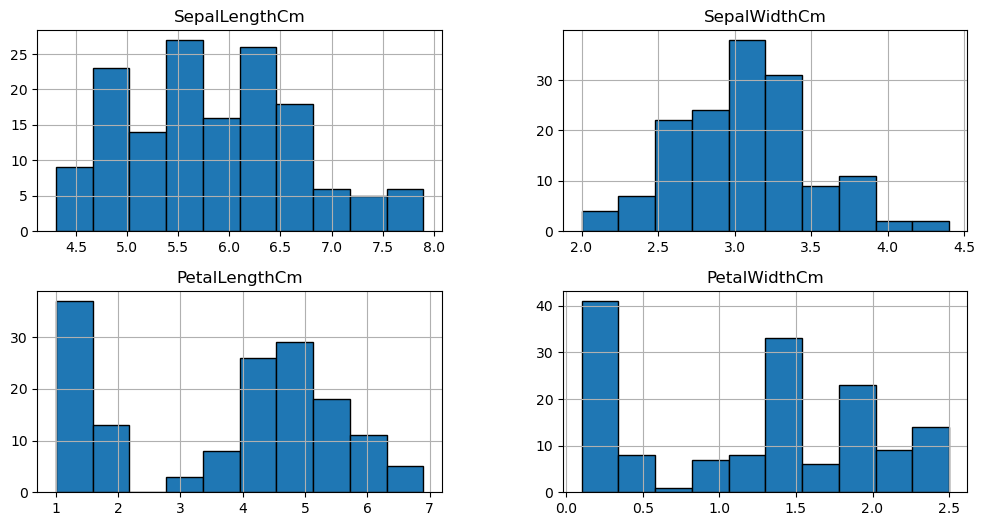

In [16]:
df.hist(edgecolor='black', linewidth=1)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [20]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Splitting of datasets into train-test set

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

# Model 

In [25]:
from sklearn.tree import DecisionTreeClassifier
df_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4,random_state=1234)
df_tree

#fiting the model
df_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1234)

# Prediction and Accuracy Evaluation

In [29]:
predtree = df_tree.predict(x_test)
print(predtree[15:25])
print(y_test[15:25])

['Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica']
['Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica']


In [30]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", round(metrics.accuracy_score(y_test, predtree),2))

DecisionTrees's Accuracy:  1.0
